In [13]:
import numpy as np
from scipy import integrate
import matplotlib as mpl
import matplotlib.pyplot as plt

# Simulating a Driven Damped Pendulum
We'll be using dimensionless variables so that the natural frequency is equal to 1.

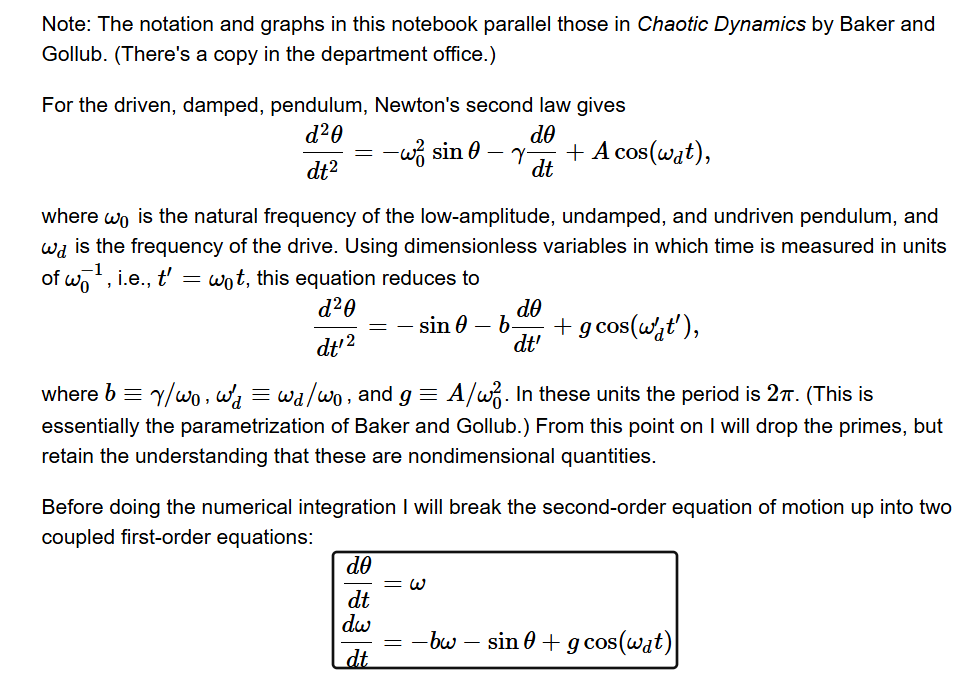

I'll be using the parameters as defined below, with the resonant frequency $\omega_0$ = 1
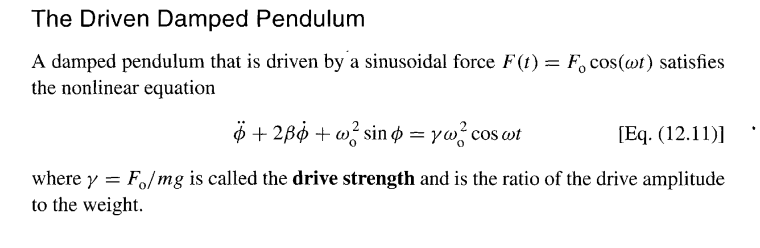

$
\frac{d\phi}{d\\t} = \dot{\phi}
\\[5mm]
\frac{d\dot{\phi}}{d\\t} = -sin(\phi) - 2\beta\dot{\phi} + \gamma cos(\omega t)
$

In [20]:
# 
def eom_dpp(t,state,beta,gamma,omega):
    '''
    Function returning derivatives of the dependent quantities theta and omega for a driven damped pendulum
    state: Array of size 2 describing state of the system
        state[0]: phi, the pendulum angle from the vertical
        state[1]: phi_dot, angular velocity    
    beta: damping parameter
    gamma: drive strength
    omega: drive frequency
    '''

    phi = state[0]
    phi_dot = state[1]

    d_phi_dt = phi_dot
    d_phi_dot_dt = -2*beta*phi_dot - np.sin(phi) + gamma*np.cos(omega*t)
    return (d_phi_dt,d_phi_dot_dt)

In [35]:
phi0 = 0        # Initial theta
phi_dot0 = 0    # Initial angular velocity
state0 = np.array([phi0,phi_dot0])

beta = 0.25         # Damping parameter
gamma = 1.06        # Driving amplitude
omega = 2/3     # Driving frequency

t_start = 0
t_end = 15*2*np.pi
t_eval = np.linspace(t_start,t_end,50*201)


In [36]:
sol = integrate.solve_ivp(eom_dpp,t_span = (t_start,t_end), y0=state0, 
                          t_eval=t_eval,atol=1e-16, rtol=1e-16,args=(beta,gamma,omega))

phi = sol.y[0]
phi_dot = sol.y[1]
t = sol.t

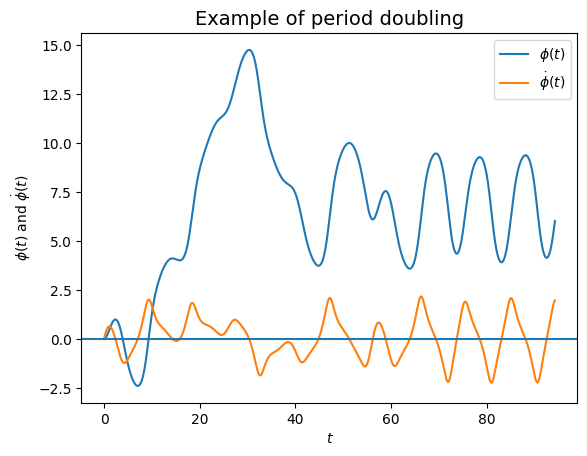

In [37]:
plt.figure(1)
plt.plot(t_eval,phi, label='$\phi(t)$')
plt.plot(t,phi_dot, label = '$\dot{\phi}(t)$')
plt.axhline(0)
plt.title("Example of period doubling",fontsize=14)
plt.xlabel("$t$")
plt.ylabel("$\phi(t)$ and $\dot{\phi}(t)$"); # No idea why I need \\theta
plt.legend()

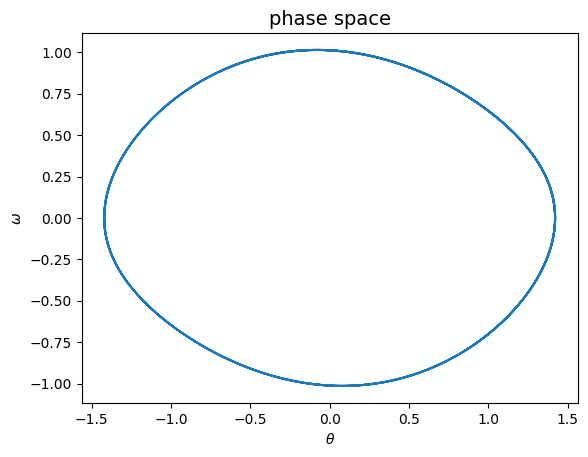

In [18]:
plt.figure(2)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("phase space",fontsize=14)
tplot = 9000
plt.plot(th[tplot:],om[tplot:]);

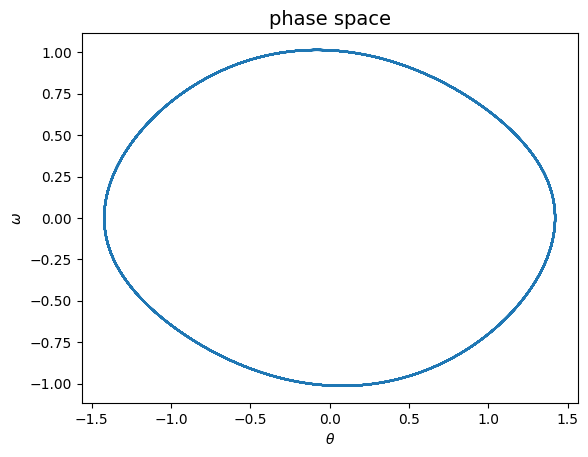

In [19]:
plt.figure(4)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("phase space",fontsize=14)
tplot = 5000
plt.plot(th[tplot:],om[tplot:]);

In [10]:
th0 = 0.1       # Initial theta
om0 = 0         # Initial angular velocity
u0 = np.array([th0,om0])# Combine initial conditions in array
b = 0.5         # Damping parameter
g = 1.105        # Driving amplitude
om_d = 2./3     # Driving frequency
t_d = 2*np.pi/om_d

t = np.linspace(14,1000*t_d, 10001)      # NOTE: The  points selected 
                                       # for plotting are not the 
                                       # points used for the numerical evalution.
th, om = integrate.odeint(eqs,u0,t,args=(b,g,om_d)).T

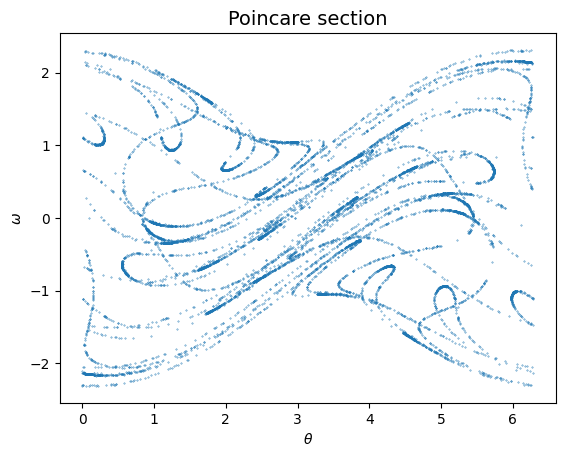

In [11]:
plt.figure(5)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("Poincare section",fontsize=14)
plt.scatter(th%(2*np.pi),om,s=0.1);